# Cole Olafson and Matt Schwartz

## Virtual Sommolier

### Description of Data Set:

We are interested in the analyzation and prediction of a wine's favorability based on factors such as country, price, province, region, and sommolier name of who rated the wine. The data comes from https://www.kaggle.com/zynicide/wine-reviews and comes from a scraping of https://www.winemag.com.

### Implementation/Technical Merit:

Anticipated challenges will be missing values and that a lot of our attributes are non-numeric which will require us a bit of preprocessing to work with. Likewise since our data includes 130,000 instances there may be unseen challenges that we are unaware of. We do not have an overly large amount of attributes so we should not come accross too many problems in terms of that. 

### Potential Impavct of the Results:

These results will be useful in the way that it helps unexperienced buyers for the home or restaurant to pick a great wine without the consultation of an experienced sommolier. These buyers may include a novice wine enthusiust who wants something to start off their new hobby with, an owner of a convenience store or restaurant that would want to know which wines to purchase to sell or not as well as a winery who may want to use something like this to determine where their focus on future products should land. 

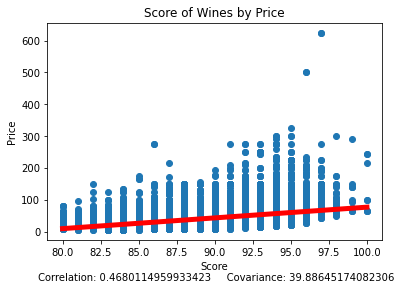

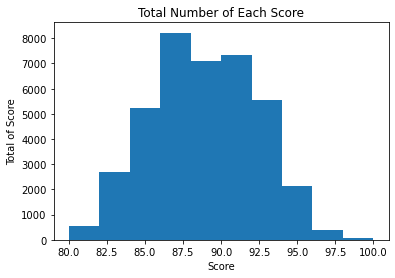

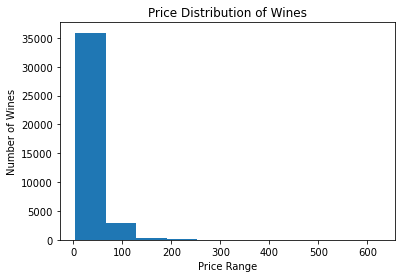

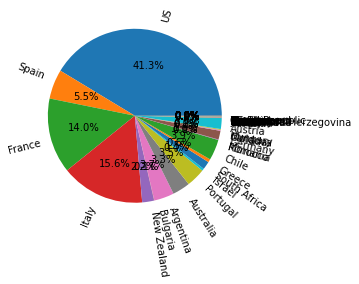

In [14]:
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MySimpleLinearRegressor, MyNaiveBayesClassifier, MyDecisionTreeClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluationn

import mysklearn.plot_utils
importlib.reload(mysklearn.plot_utils)
import mysklearn.plot_utils as plot_utils

table = MyPyTable()
table.load_from_file("input_data/winemag-data_first150k.csv")
country = table.get_column("country")



name = []
vals = []
for x in country:
    if x in name:
        index = name.index(x)
        vals[index]+=1
    else:
        name.append(x)
        vals.append(1)

table.remove_rows_with_missing_values()

scores = table.get_column("points")
price = table.get_column("price")


#remove huge outlier
for x in price:
    x = int(x)
max_ind = price.index(max(price))
del price[max_ind]
del scores[max_ind]
del country[max_ind]

#scores by price
plot_utils.makeScatterPlot(scores,price,"Score","Price", "Score of Wines by Price")

#score distribution
plot_utils.makeHistogram(scores, "Score","Total of Score","Total Number of Each Score")

#show distribution of prices
plot_utils.makeHistogram(price,"Price Range","Number of Wines","Price Distribution of Wines")

#show country distribution
plot_utils.makePieChart(name,vals)



